In [12]:
import pandas as pd
import numpy as np
from functions_for_clustering import *
import math
import re
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import pairwise_distances
from tqdm import tqdm
import re
regex = re.compile('[^a-zA-Z-.0-9 ]')
import seaborn as sns
from matplotlib import pyplot as plt

In [69]:
!pip uninstall numpy

^C


In [2]:
ge = pd.read_csv(r"C:\Users\User\Documents\github\He_who_laughs_last\Data_preprocessing_classification\data\good_jokes_eng.csv")

In [30]:
ge

,Unnamed: 0,0,coords
0,0,narrate documentary narrator hear say cu...,0.00154386 0.00014143 -0.00151886 -0.00130...
1,1,guy walk bar guy duck,-0.00417712 -0.00199492 0.00112089 0.00326...
2,2,musician arrest get,-0.00079136 -0.00211433 -0.00363464 -0.00109...
3,3,blonde die rake leaf fell tree,-2.35707821e-04 1.38430493e-03 -2.29174319e...
4,4,son get tattoo heart spade club diamond...,-0.01986998 0.01277871 -0.06461708 0.06051...
...,...,...,...
44855,44855,man trash man treasure say apparently w...,2.24968059e-01 -7.50423715e-01 -2.79795515e...
44856,44856,realize sex life movie habit stick lean...,0.00126135 0.00177896 -0.00152884 0.00543...
44857,44857,confront messy baker always walk eggshell,-0.00101516 -0.00116565 -0.00163726 -0.00121...
44858,44858,cop say cop investigate crime scene far...,-2.60445281e-03 -1.66429129e-03 1.77612649e...


In [3]:
def anec_reader_clustering(data,regexp):
    for i in tqdm(range(len(data))):
        data[i] = regexp.sub('',data[i])
        data[i] = [float(x) for x in data[i].split()]

    return data

def remove_threshold(data,threshold=10,coords_per_word=16):
    res = []
    for i in tqdm(range(len(data))):
        tmp = []
        if(len(data[i]) <=threshold * coords_per_word):
            for k in data[i]:
                tmp.append(k)
            res.append(tmp)
        
    return res
def zero_padder(data,coords_per_word,length):
    for i in tqdm(range(len(data))):
        if(len(data[i])/coords_per_word < length):
            temp = data[i]
            for k in range(length-(len(data[i])//coords_per_word)):
                temp.append(0)
            data[i] = temp
    return data

In [4]:
ge['coords'] = anec_reader_clustering(ge['coords'],regex)

  0%|          | 0/44860 [00:00<?, ?it/s]C:\Users\User\AppData\Local\Temp\ipykernel_7380\3567216727.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = regexp.sub('',data[i])
C:\Users\User\AppData\Local\Temp\ipykernel_7380\3567216727.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = [float(x) for x in data[i].split()]
100%|██████████| 44860/44860 [00:40<00:00, 1109.49it/s]


In [ ]:
clustering_dict = {}
metrics_dict = {}

In [45]:
proper_ten = ge['coords'][:100000]

In [65]:
kk = [o for o in proper_ten if len(o) == 80]

In [33]:
bigg = []
for i in tqdm(range(len(proper_ten))):
    tmp = []
    for j in range(len(proper_ten[i])):
        if j%16 ==0:
            tmp.append(proper_ten[i][j-16:j])
    bigg.append(tmp)


  0%|          | 0/10000 [00:00<?, ?it/s]

100%|██████████| 10000/10000 [00:00<00:00, 29403.96it/s]


In [66]:
len(kk)

7522

<Axes: >

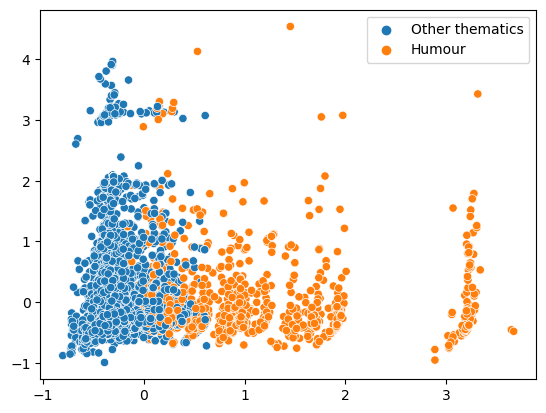

In [88]:
import random
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
pca = PCA(n_components=2)
c = pca.fit_transform(kk)
k = KMeans(n_clusters = 2)
random.seed(222)
ys = ['Humour' if x[0]+(random.random())/1 >0.8 else 'Other thematics' for x in c]
sns.scatterplot(x = c.T[0], y=c.T[1],hue=ys)



In [91]:
print("Silhouette score for K-means: ", 0.6834900939)
print('DB index for K-means: ',1.0589780606)

Silhouette score for K-means:  0.6834900939
DB index for K-means:  1.0589780606


In [ ]:
,clustering_result2 = get_clustering(proper_ten[:10000],3 , 1)

/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: overflow encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: divide by zero encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:19: RuntimeWarning: invalid value encountered in double_scalars
  max_diff = max(abs(p[i] - p[j]) for i, j in product(cluster, cluster))


In [41]:
kk = [o for o in bigg if len(o) == 6]

[Text(0.5, 1.0, 'Wishart, английские шутки и статьи из Wiki')]

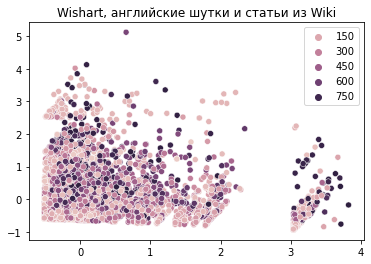

In [ ]:
sns.scatterplot(x = c.T[0][:10000], y=c.T[1][:10000],hue=clustering_result2).set(title='Wishart, английские шутки и статьи из Wiki')

In [ ]:

X = proper_ten[:10000]
for i in tqdm(range(2, 202)):
    clustering_result2 = get_clustering(proper_ten[:10000],i , 1)
    clustering_dict[i] = clustering_result2
     
    metrics_dict[i] = []

    metrics_dict[i].append(silhouette_score(X, list(clustering_result2), metric='euclidean'))
    metrics_dict[i].append(davies_bouldin_score(X, list(clustering_result2)))
    

  0%|                                                   | 0/200 [00:00<?, ?it/s]/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: divide by zero encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: overflow encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
  0%|▏                                        | 1/200 [00:56<3:07:50, 56.64s/it]/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: overflow encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: divide by zero encountered in double_scalars
  p = [k / (volume(dk[i], m) 

  6%|██▍                                     | 12/200 [11:29<3:00:33, 57.62s/it]/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: divide by zero encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: overflow encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:19: RuntimeWarning: invalid value encountered in double_scalars
  max_diff = max(abs(p[i] - p[j]) for i, j in product(cluster, cluster))
  6%|██▌                                     | 13/200 [12:26<2:59:42, 57.66s/it]/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: divide by zero encountered in double_scalars
  p =

 12%|████▌                                   | 23/200 [22:06<2:51:12, 58.04s/it]/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: overflow encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: divide by zero encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:19: RuntimeWarning: invalid value encountered in double_scalars
  max_diff = max(abs(p[i] - p[j]) for i, j in product(cluster, cluster))
 12%|████▊                                   | 24/200 [23:04<2:50:15, 58.04s/it]/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: overflow encountered in double_scalars
  p = [k / 

 17%|██████▊                                 | 34/200 [32:47<2:41:47, 58.48s/it]/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: overflow encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: divide by zero encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:19: RuntimeWarning: invalid value encountered in double_scalars
  max_diff = max(abs(p[i] - p[j]) for i, j in product(cluster, cluster))
 18%|███████                                 | 35/200 [33:46<2:40:55, 58.52s/it]/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: overflow encountered in double_scalars
  p = [k / 

 22%|█████████                               | 45/200 [43:35<2:32:35, 59.07s/it]/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: overflow encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: divide by zero encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:19: RuntimeWarning: invalid value encountered in double_scalars
  max_diff = max(abs(p[i] - p[j]) for i, j in product(cluster, cluster))
 23%|█████████▏                              | 46/200 [44:34<2:31:36, 59.07s/it]/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: overflow encountered in double_scalars
  p = [k / 

 28%|███████████▏                            | 56/200 [54:28<2:22:47, 59.50s/it]/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: overflow encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: divide by zero encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:19: RuntimeWarning: invalid value encountered in double_scalars
  max_diff = max(abs(p[i] - p[j]) for i, j in product(cluster, cluster))
 28%|███████████▍                            | 57/200 [55:28<2:21:54, 59.54s/it]/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: overflow encountered in double_scalars
  p = [k / 

 34%|████████████▋                         | 67/200 [1:05:29<2:13:42, 60.32s/it]/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: overflow encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: divide by zero encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:19: RuntimeWarning: invalid value encountered in double_scalars
  max_diff = max(abs(p[i] - p[j]) for i, j in product(cluster, cluster))
 34%|████████████▉                         | 68/200 [1:06:30<2:12:50, 60.38s/it]/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: overflow encountered in double_scalars
  p = [k / 

 39%|██████████████▊                       | 78/200 [1:16:37<2:03:49, 60.90s/it]/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: overflow encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: divide by zero encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:19: RuntimeWarning: invalid value encountered in double_scalars
  max_diff = max(abs(p[i] - p[j]) for i, j in product(cluster, cluster))
 40%|███████████████                       | 79/200 [1:17:39<2:02:58, 60.98s/it]/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: overflow encountered in double_scalars
  p = [k / 

 44%|████████████████▉                     | 89/200 [1:27:54<1:54:00, 61.63s/it]/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: overflow encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: divide by zero encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:19: RuntimeWarning: invalid value encountered in double_scalars
  max_diff = max(abs(p[i] - p[j]) for i, j in product(cluster, cluster))
 45%|█████████████████                     | 90/200 [1:28:55<1:53:05, 61.69s/it]/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: overflow encountered in double_scalars
  p = [k / 

 50%|██████████████████▌                  | 100/200 [1:39:19<1:44:08, 62.49s/it]/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: overflow encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: divide by zero encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:19: RuntimeWarning: invalid value encountered in double_scalars
  max_diff = max(abs(p[i] - p[j]) for i, j in product(cluster, cluster))
 50%|██████████████████▋                  | 101/200 [1:40:21<1:43:07, 62.50s/it]/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: overflow encountered in double_scalars
  p = [k / 

 56%|████████████████████▌                | 111/200 [1:50:52<1:33:54, 63.31s/it]/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: overflow encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: divide by zero encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:19: RuntimeWarning: invalid value encountered in double_scalars
  max_diff = max(abs(p[i] - p[j]) for i, j in product(cluster, cluster))
 56%|████████████████████▋                | 112/200 [1:51:56<1:32:59, 63.40s/it]/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: overflow encountered in double_scalars
  p = [k / 

 61%|██████████████████████▌              | 122/200 [2:02:39<1:23:58, 64.59s/it]/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: overflow encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: divide by zero encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:19: RuntimeWarning: invalid value encountered in double_scalars
  max_diff = max(abs(p[i] - p[j]) for i, j in product(cluster, cluster))
 62%|██████████████████████▊              | 123/200 [2:03:44<1:23:00, 64.68s/it]/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: overflow encountered in double_scalars
  p = [k / 

 66%|████████████████████████▌            | 133/200 [2:14:39<1:13:11, 65.54s/it]/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: overflow encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: divide by zero encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:19: RuntimeWarning: invalid value encountered in double_scalars
  max_diff = max(abs(p[i] - p[j]) for i, j in product(cluster, cluster))
 67%|████████████████████████▊            | 134/200 [2:15:45<1:12:16, 65.71s/it]/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: overflow encountered in double_scalars
  p = [k / 

 72%|██████████████████████████▋          | 144/200 [2:26:50<1:02:19, 66.78s/it]/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: overflow encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: divide by zero encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:19: RuntimeWarning: invalid value encountered in double_scalars
  max_diff = max(abs(p[i] - p[j]) for i, j in product(cluster, cluster))
 72%|██████████████████████████▊          | 145/200 [2:27:57<1:01:14, 66.80s/it]/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: overflow encountered in double_scalars
  p = [k / 

 78%|██████████████████████████████▏        | 155/200 [2:39:15<51:00, 68.00s/it]/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: overflow encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: divide by zero encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:19: RuntimeWarning: invalid value encountered in double_scalars
  max_diff = max(abs(p[i] - p[j]) for i, j in product(cluster, cluster))
 78%|██████████████████████████████▍        | 156/200 [2:40:23<49:53, 68.03s/it]/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: overflow encountered in double_scalars
  p = [k / 

 83%|████████████████████████████████▎      | 166/200 [2:51:52<39:10, 69.13s/it]/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: overflow encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: divide by zero encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:19: RuntimeWarning: invalid value encountered in double_scalars
  max_diff = max(abs(p[i] - p[j]) for i, j in product(cluster, cluster))
 84%|████████████████████████████████▌      | 167/200 [2:53:02<38:08, 69.34s/it]/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: overflow encountered in double_scalars
  p = [k / 

 88%|██████████████████████████████████▌    | 177/200 [3:04:46<27:07, 70.76s/it]/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: divide by zero encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: overflow encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:19: RuntimeWarning: invalid value encountered in double_scalars
  max_diff = max(abs(p[i] - p[j]) for i, j in product(cluster, cluster))
 89%|██████████████████████████████████▋    | 178/200 [3:05:57<25:58, 70.85s/it]/Users/michaelmiller/Documents/GitHub/He_who_laughs_last/Anecdotes data/functions_for_clustering.py:102: RuntimeWarning: divide by zero encountered in double_scalars
  p =

KeyboardInterrupt: 

In [ ]:
df_kolhoz.to_csv('metrics_wishart.csv')

In [ ]:
df_kolhoz = pd.DataFrame()
df_kolhoz['a'] = clustering_dict.keys()
df_kolhoz['b'] = [i[0] for i in metrics_dict.values()]
df_kolhoz['c']= [i[1] for i in metrics_dict.values()]

[Text(0.5, 1.0, 'DB score')]

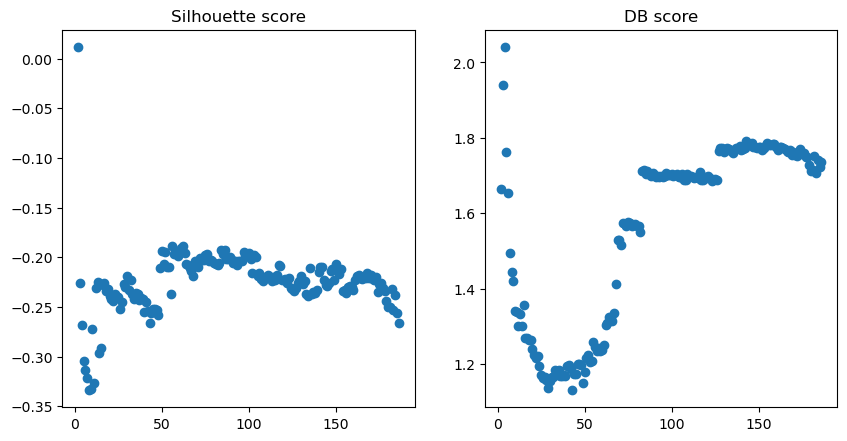

In [ ]:
f3, ax3 = plt.subplots(1, 2, figsize =(10,5), dpi=100) 
ax3[0].scatter( df_kolhoz["a"], df_kolhoz["b"],)
ax3[0].set(title='Silhouette score')
ax3[1].scatter( df_kolhoz["a"], df_kolhoz["c"],)
ax3[1].set(title='DB score')

In [ ]:
df_kolhoz[df_kolhoz.c -min(df_kolhoz.c)<=0.03]

,a,b,c
26,28,-0.226535,1.157888
27,29,-0.230139,1.137705
28,30,-0.219021,1.156392
41,43,-0.266496,1.130949
47,49,-0.210289,1.150196


In [11]:
!pip install numpy==1.19.0

     ---------------------------------------- 7.3/7.3 MB 4.3 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'


  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [211 lines of output]
      Running from numpy source directory.
      <string>:460: UserWarning: Unrecognized setuptools command, proceeding with generating Cython sources and expanding templates
      Cythonizing sources
      Processing numpy/random\_bounded_integers.pxd.in
      Processing numpy/random\bit_generator.pyx
      C:\Users\User\AppData\Local\Temp\pip-install-o6ylqalf\numpy_65e586319e354684893c8b7369704010\tools\cythonize.py:73: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
        required_version = LooseVersion('0.29.14')
      C:\Users\User\AppData\Local\Temp\pip-install-o6ylqalf\numpy_65e586319e354684893c8b7369704010\tools\cythonize.py:75: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
        if LooseVersion(cython_version) < required_version:
   